##### 1. The Dataset was successfully downloaded.

Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection  import train_test_split

##### 2. Load the Dataset

In [ ]:
data = pd.read_csv("Churn_Modelling.csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 3. Perform Below Visualizations

###### 3.1 Univariate Analysis

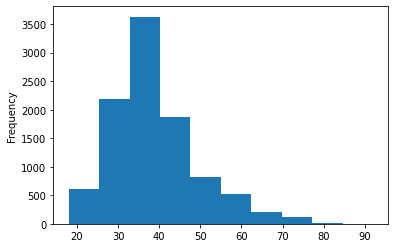

In [ ]:
#Histogram
data['Age'].plot(kind='hist')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfc72d4050>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfc72d4ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfc7349a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfc72db5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfc72dbb10>],
 'means': []}

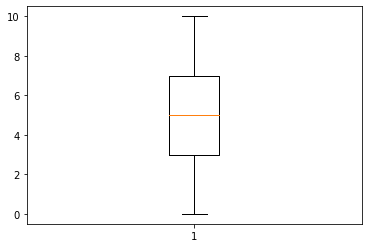

In [ ]:
#Boxplot
plt.boxplot(data['Tenure'])

<BarContainer object of 10000 artists>

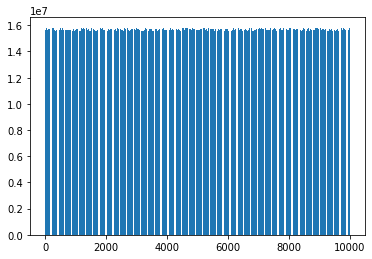

In [ ]:
#Bar chart
df = pd.DataFrame(data)
X = list(df.iloc[:,0])
Y = list(df.iloc[:,1])
plt.bar(X,Y)

######  3.2 Bivariate Analysis

<BarContainer object of 10000 artists>

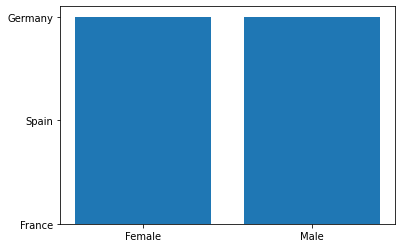

In [ ]:
#Stacked Bar Chart
plt.bar(data['Gender'],data['Geography'])

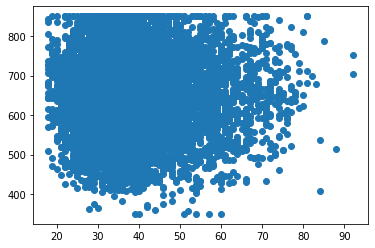

In [ ]:
#Scatter plot
plt.scatter(data['Age'],data['CreditScore'])

###### 3.3 Multivariate Analysis

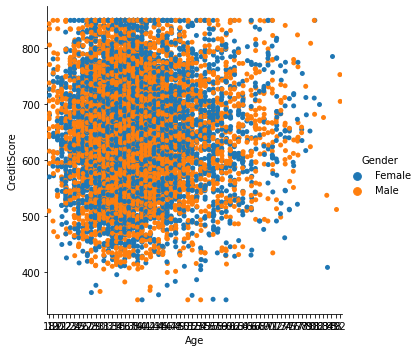

In [ ]:
sns.catplot(data=data,x='Age',y='CreditScore',hue='Gender')

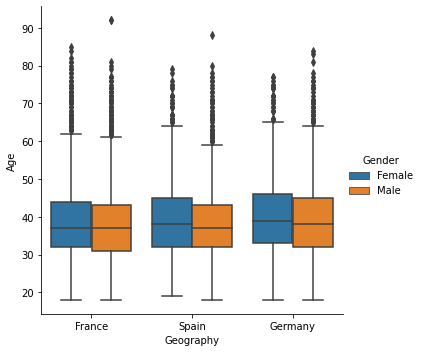

In [ ]:
#Box Plot
sns.catplot(data=data,x='Geography',y='Age',hue='Gender',kind='box')

##### 4. Perform Descriptive Statistics on the dataset

In [ ]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [ ]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.shape

(10000, 14)

##### 5. Handle the missing values

In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### 6. Find the Outliners and replace the Outliners

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


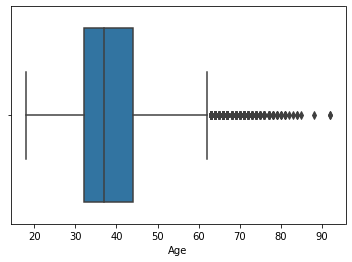

In [ ]:
sns.boxplot(data['Age'])

In [ ]:
qnt = data.quantile(q=[0.25,0.75])
qnt

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.25,2500.75,15628528.25,584.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0
0.75,7500.25,15753233.75,718.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0


In [ ]:
IQR = qnt.loc[0.75] - qnt.loc[0.25]
IQR

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [ ]:
upper_extreme = qnt.loc[0.75]+1.5*IQR
upper_extreme

RowNumber          1.499950e+04
CustomerId         1.594029e+07
CreditScore        9.190000e+02
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [ ]:
lower_extreme = qnt.loc[0.25]-1.5*IQR
lower_extreme

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
CreditScore        3.830000e+02
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [ ]:
df2 = data[(data['Age']<upper_extreme['Age']) & (data['Age']>lower_extreme['Age'])]
df.shape

(10000, 14)

In [ ]:
df2.shape

(9589, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


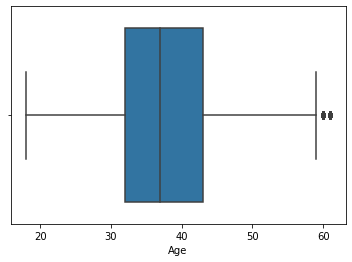

In [ ]:
sns.boxplot(df2['Age'])

##### 7. Check the Categorial columns and perform Encoding

In [ ]:
le = LabelEncoder()
df2['Geography'] = le.fit_transform(df2['Geography'])
df2['Gender'] = le.fit_transform(df2['Gender'])
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


##### 8. Split the data into dependent and independent variables

In [ ]:
x = df.iloc[:,:-1].values
x

array([[1, 15634602, 'Hargrave', ..., 1, 1, 101348.88],
       [2, 15647311, 'Hill', ..., 0, 1, 112542.58],
       [3, 15619304, 'Onio', ..., 1, 0, 113931.57],
       ...,
       [9998, 15584532, 'Liu', ..., 0, 1, 42085.58],
       [9999, 15682355, 'Sabbatini', ..., 1, 0, 92888.52],
       [10000, 15628319, 'Walker', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0])

##### 9. Scale the independent variables

In [ ]:
scaler = MinMaxScaler()
df[['CustomerId']] = scaler.fit_transform(df[['CustomerId']])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0.275616,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,0.326454,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,0.214421,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,0.542636,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,0.688778,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.162119,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,0.016765,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,0.075327,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,0.466637,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##### 10. Split the data into training and testing

In [ ]:
train_size=0.8
X = df.drop(columns=['Tenure']).copy()
Y = df['Tenure']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

      RowNumber  CustomerId          Surname  CreditScore Geography  Gender  \
3893       3894    0.396421        Chinweuba          543    France  Female   
3109       3110    0.680738              Law          850   Germany  Female   
603         604    0.106749            Burke          566    France    Male   
904         905    0.915556            Ch'en          599    France    Male   
3469       3470    0.361596  Cumbrae-Stewart          679     Spain  Female   
...         ...         ...              ...          ...       ...     ...   
5935       5936    0.849589        Stevenson          544     Spain    Male   
6210       6211    0.105989          Simmons          522     Spain    Male   
7570       7571    0.905012           Harker          697    France    Male   
6644       6645    0.008768              Lei          556   Germany    Male   
8260       8261    0.248527         Nikitina          640   Germany  Female   

      Age    Balance  NumOfProducts  HasCrCard  IsA